In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn 
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)



In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


C:\Users\deema\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness: 17.40
Kurtosis: 603.93


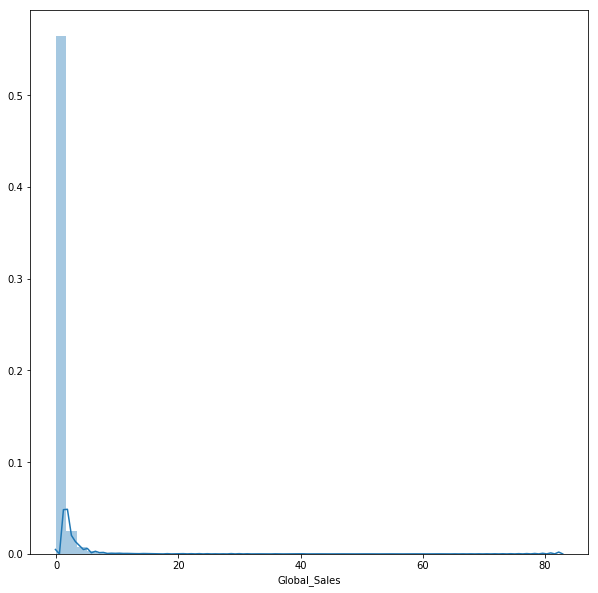

In [6]:
# we want predict global sales and we want see how the global sales distribution

plt.figure(figsize=(10,10))
sns.distplot(df.Global_Sales)
print("Skewness: %0.2f" % df['Global_Sales'].skew())
print("Kurtosis: %0.2f" % df['Global_Sales'].kurt())

In [7]:
# as we see above it is long tail (outlier) so we have log_transofar global sales
df['Global_Sales_Log'] = np.log1p(df['Global_Sales'])

C:\Users\deema\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness: 2.75
Kurtosis: 10.66


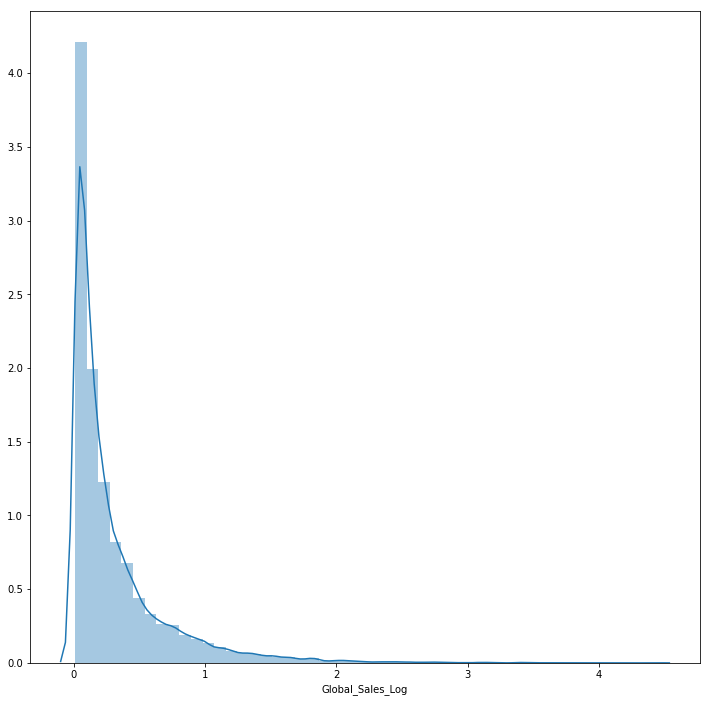

In [8]:
plt.figure(figsize=(12,12))
sns.distplot(df.Global_Sales_Log)

print("Skewness: %0.2f" % df['Global_Sales_Log'].skew())
print("Kurtosis: %0.2f" % df['Global_Sales_Log'].kurt())

In [9]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()                        #check null values

Year         271
Publisher     58
dtype: int64

In [10]:
df[df.Year.isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Global_Sales_Log
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,1.829376
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,1.501853
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17,1.427916
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,1.386294
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,1.261298
624,625,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0.00,0.21,2.48,1.247032
649,650,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39,1.220830
652,653,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.54,0.63,0.00,0.22,2.39,1.220830
711,713,Call of Duty 3,Wii,NaN,Shooter,Activision,1.19,0.84,0.00,0.23,2.26,1.181727
782,784,Rock Band,Wii,NaN,Misc,MTV Games,1.35,0.56,0.00,0.20,2.11,1.134623


In [11]:
df[df.Publisher.isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Global_Sales_Log
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,1.386294
1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46,0.900161
1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21,0.792993
2222,2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.00,0.02,0.93,0.657520
3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64,0.494696
3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01,0.64,0.494696
3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53,0.425268
4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48,0.392042
4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.31,0.11,0.00,0.01,0.43,0.357674
4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.0,Misc,NaN,0.30,0.11,0.00,0.01,0.42,0.350657


In [12]:
           #fill NaN value to 0

In [13]:
df['Publisher'].fillna(value='Unknown', inplace=True)  #fill NaN values to unknown

In [14]:
df[df['Year']==0].Platform.unique()

array([], dtype=object)

In [15]:
PS2_median = df[df['Platform'] == 'PS2']['Year'].median()
Wii_median = df[df['Platform'] == 'Wii']['Year'].median()
x2600median = df[df['Platform'] == '2600']['Year'].median()
X360_median = df[df['Platform'] == 'X360']['Year'].median()
GBA_median = df[df['Platform'] == 'GBA']['Year'].median()
PC_median = df[df['Platform'] == 'PC']['Year'].median()
PS3_median = df[df['Platform'] == 'PS3']['Year'].median()
PS_median = df[df['Platform'] == 'PS']['Year'].median()
PSP_median = df[df['Platform'] == 'PSP']['Year'].median()
XB_median = df[df['Platform'] == 'XB']['Year'].median()
GB_median = df[df['Platform'] == 'GB']['Year'].median()
DS_median = df[df['Platform'] == 'DS']['Year'].median()
x3DS_median = df[df['Platform'] == '3DS']['Year'].median()
N64_median = df[df['Platform'] == 'N64']['Year'].median()
PSV_median = df[df['Platform'] == 'PSV']['Year'].median()
GC_median = df[df['Platform'] == 'GC']['Year'].median()

In [16]:
def year_filler(x):
    
    if x.Year_of_Release == 0:
        if x.Platform == 'PS2':
            return PS2_median
        elif x.Platform == 'Wii':
            return Wii_median
        elif x.Platform == '2600':
            return x2600median
        elif x.Platform == 'X360':
            return X360_median
        elif x.Platform == 'GBA':
            return GBA_median
        elif x.Platform == 'PC':
            return PC_median
        elif x.Platform == 'PS3':
            return PS3_median
        elif x.Platform == 'PS':
            return PS_median
        elif x.Platform == 'PSP':
            return PSP_median
        elif x.Platform == 'XB':
            return XB_median
        elif x.Platform == 'GB':
            return GB_median
        elif x.Platform == 'DS':
            return DS_median
        elif x.Platform == '3DS':
            return x3DS_median
        elif x.Platform == 'N64':
            return N64_median
        elif x.Platform == 'PSV':
            return PSV_median
        elif x.Platform == 'GC':
            return GC_median
        else:
            return 1900
    else:
        return x.Year

In [17]:
columns = df.columns
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': columns,                            #test missing value 
                                 'percent_missing': percent_missing})
print(missing_value_df)

                       column_name  percent_missing
Rank                          Rank         0.000000
Name                          Name         0.000000
Platform                  Platform         0.000000
Year                          Year         1.632727
Genre                        Genre         0.000000
Publisher                Publisher         0.000000
NA_Sales                  NA_Sales         0.000000
EU_Sales                  EU_Sales         0.000000
JP_Sales                  JP_Sales         0.000000
Other_Sales            Other_Sales         0.000000
Global_Sales          Global_Sales         0.000000
Global_Sales_Log  Global_Sales_Log         0.000000


In [18]:
df['NA_Sales_Log'] = np.log1p(df['NA_Sales'])
df['EU_Sales_Log'] = np.log1p(df['EU_Sales'])
df['JP_Sales_Log'] = np.log1p(df['JP_Sales'])
df['Other_Sales_Log'] = np.log1p(df['Other_Sales'])

C:\Users\deema\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\deema\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


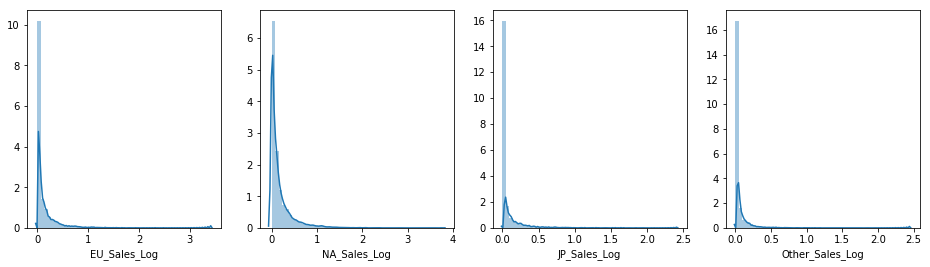

In [19]:
fig, ax =plt.subplots(1,4, figsize=(16,4))
sns.distplot(df['EU_Sales_Log'], ax=ax[0])
sns.distplot(df['NA_Sales_Log'], ax=ax[1])
sns.distplot(df['JP_Sales_Log'], ax=ax[2])
sns.distplot(df['Other_Sales_Log'], ax=ax[3])
fig.show()


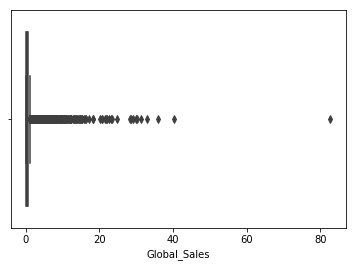

In [20]:
sns.boxplot(df.Global_Sales)   #remove outlier

In [21]:
# we should remove the outlier above because it is big 80 !!
df.drop(index=[0], inplace=True)


In [22]:
df.groupby('Genre')['Global_Sales'].max().sort_values(ascending=False)  #highst global sale by genre

Genre
Platform        40.24
Racing          35.82
Sports          33.00
Role-Playing    31.37
Puzzle          30.26
Misc            29.02
Shooter         28.31
Simulation      24.76
Action          21.40
Fighting        13.04
Adventure       11.18
Strategy         5.45
Name: Global_Sales, dtype: float64

C:\Users\deema\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


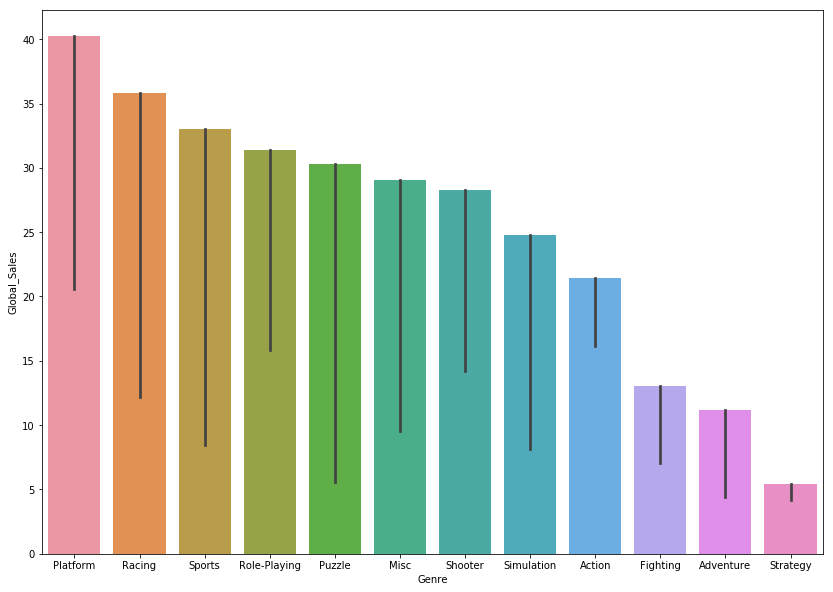

In [23]:
plt.figure(figsize=(14,10))
sns.barplot(x=df.Genre,y=df.Global_Sales, estimator=np.max)

C:\Users\deema\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


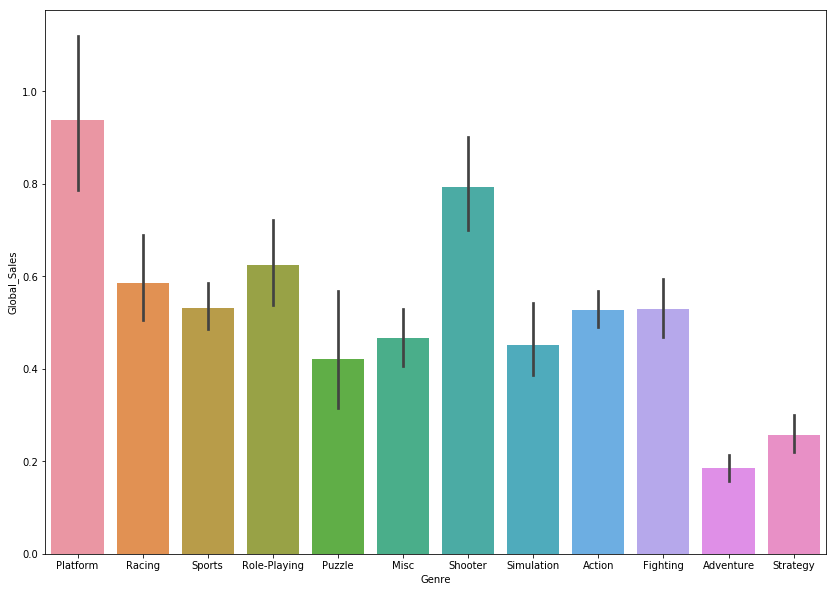

In [24]:
# we can see up the best game is platform...
plt.figure(figsize=(14,10))
sns.barplot(x=df.Genre,y=df.Global_Sales, estimator=np.mean)

In [25]:
#according above fig we can see the platform genre has the highest global sales....

df.Genre.value_counts()          #common genre

Action          3316
Sports          2345
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [26]:
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Global_Sales_Log,NA_Sales_Log,EU_Sales_Log,JP_Sales_Log,Other_Sales_Log
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,3.719409,3.403860,1.521699,2.055405,0.570980
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,3.606041,2.824351,2.630449,1.566530,1.460938
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,3.526361,2.818398,2.485740,1.453953,1.376244
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,3.477232,2.507157,2.291524,2.417698,0.693147
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,3.442339,3.186353,1.181727,1.652497,0.457425


C:\Users\deema\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


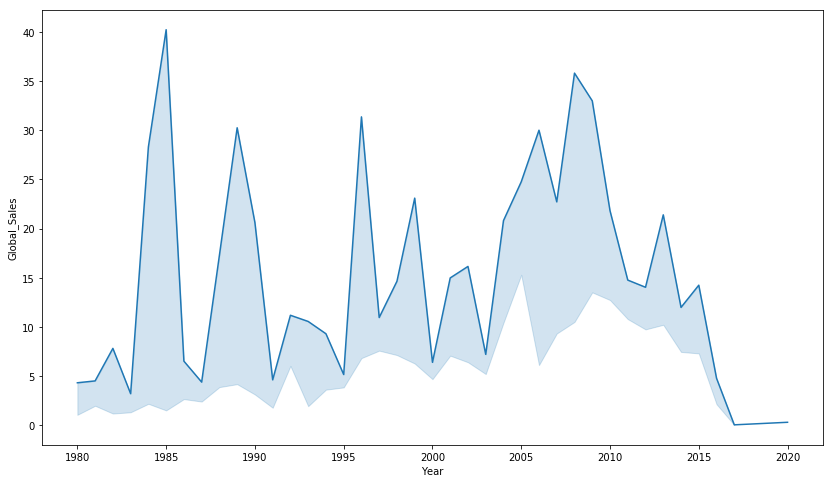

In [27]:
plt.figure(figsize=(14,8))                          #in which year highst global sale
sns.lineplot(x='Year',y='Global_Sales',data=df, estimator=np.max)

C:\Users\deema\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


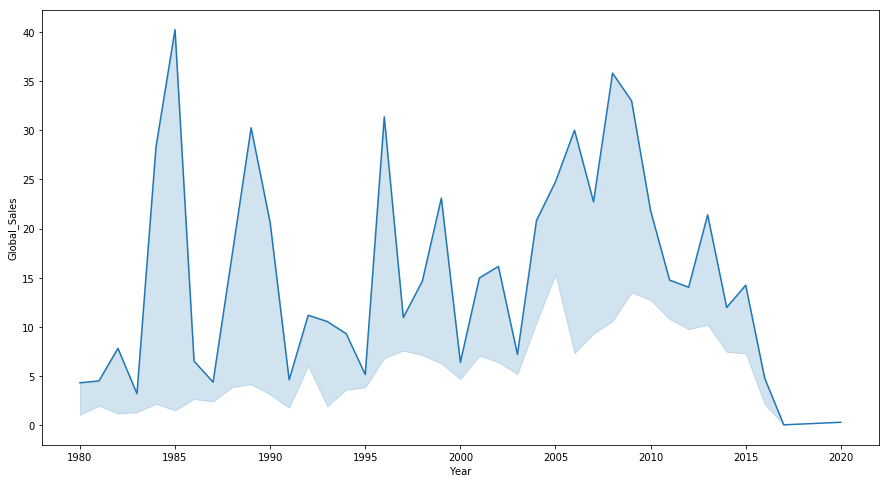

In [28]:
plt.figure(figsize=(15,8))
sns.lineplot(x='Year',y='Global_Sales',data=df, estimator=np.max)  

In [ ]:
# highst global sales above ....